<a href="https://colab.research.google.com/github/rajy4683/EVAP2/blob/master/EVA6_S11YoloV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 34.25 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!mkdir /content/YoloV3/weights 
!cp /content/gdrive/MyDrive/EVA6/S11/yolov3-spp-ultralytics.pt /content/YoloV3/weights

In [4]:
!mv /content/YoloV3/data/customdata /content/YoloV3/data/customdata_old

In [ ]:
!cp /content/gdrive/MyDrive/EVA6/S11/customdata.zip /content
!unzip /content/customdata.zip 

In [6]:
!mv /content/customdata /content/YoloV3/data
!cp /content/gdrive/MyDrive/EVA6/S11/yolov3_s11_run*.pt /content/YoloV3/weights

In [7]:
!cp /content/gdrive/MyDrive/EVA6/S11/*.mp4 /content

In [8]:
!cp /content/YoloV3/data/customdata/yolov3-custom.cfg /content/YoloV3/cfg/yolov3-custom.cfg

In [9]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [8]:
ls

customdata.zip  gdrive/  sample_data/  YoloV3/


In [10]:
cd YoloV3/

/content/YoloV3


In [10]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png


In [15]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-08-01 14:07:34.365470: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 2750.90it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 123.46it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00,

In [8]:
!cp /content/gdrive/MyDrive/EVA6/S11/yolov3_s11_run1.pt /content/YoloV3/weights

In [49]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 30 --notest

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=30, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=True, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-08-01 20:44:45.416524: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2863 found, 131 missing, 38 empty, 0 duplicate, for 3032 images): 100% 3032/3032 [00:00<00:00, 7305.14it/s]
Caching images (1.7GB): 100% 3032/3032 [00:20<00:00, 148.83it/s]
Reading image shapes: 100% 318/318 [00:00<00:00, 4734.25it/s]
Caching labels (2

In [51]:
!cp -Rf /content/YoloV3/out_out /content/gdrive/MyDrive/EVA6/S11/

In [50]:
!cp /content/YoloV3/weights/best.pt /content/gdrive/MyDrive/EVA6/S11/yolov3_s11_run1.pt

In [30]:
!cp /content/gdrive/MyDrive/EVA6/S11/*.mp4 /content

In [ ]:
!python3 detect.py --source /content/people_masks2.mp4 --weights /content/YoloV3/weights/yolov3_s11_run1.pt

In [23]:
# !mkdir -p /content/gdrive/MyDrive/EVA6/S11/output_1
!cp /content/YoloV3/output/*.mp4 /content/gdrive/MyDrive/EVA6/S11/output_1

In [26]:
!cp /content/YoloV3/output/safety.mp4 /content/gdrive/MyDrive/EVA6/S11

In [12]:
!cp /content/gdrive/MyDrive/EVA6/S11/finalsamples.zip /content
!unzip -q /content/finalsamples.zip

In [44]:
!cp /content/YoloV3/data/customdata/custom.names /content/YoloV3/data/customdata/custom_orig.names

In [18]:
!cp /content/YoloV3/data/customdata/yolov3-custom.cfg /content/YoloV3/cfg/yolov3-custom.cfg

In [14]:
!python3 detect.py  --source /content/YoloV3/finalsamples --conf-thres 0.1 --output sample_pics --weights /content/YoloV3/weights/yolov3_s11_run1.pt

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='sample_pics', save_txt=False, source='/content/YoloV3/finalsamples', view_img=False, weights='/content/YoloV3/weights/yolov3_s11_run1.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/17 /content/YoloV3/finalsamples/Screenshot 2021-07-24 013811.jpg: 

In [ ]:
!tar -czvf /content/YoloV3/sample_pics.tar.gz /content/YoloV3/sample_pics

In [ ]:
!cp /content/YoloV3/sample_pics.tar.gz 

In [ ]:
!python detect.py --conf-thres 0.1 --output out_out

### Results on collected images

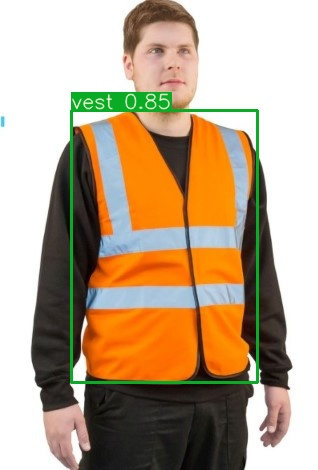

In [34]:
Image("/content/YoloV3/sample_pics/Screenshot 2021-07-24 013811.jpg", width=200)

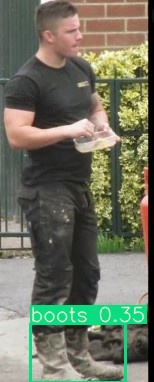

In [26]:
, witImage("/content/YoloV3/sample_pics/boots_img9.jpg")

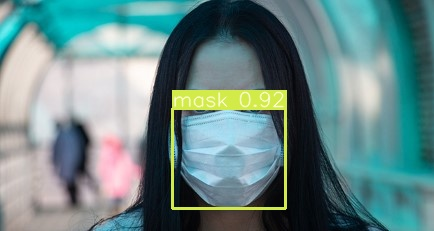

In [28]:
Image("/content/YoloV3/sample_pics/masks_img1.jpg")

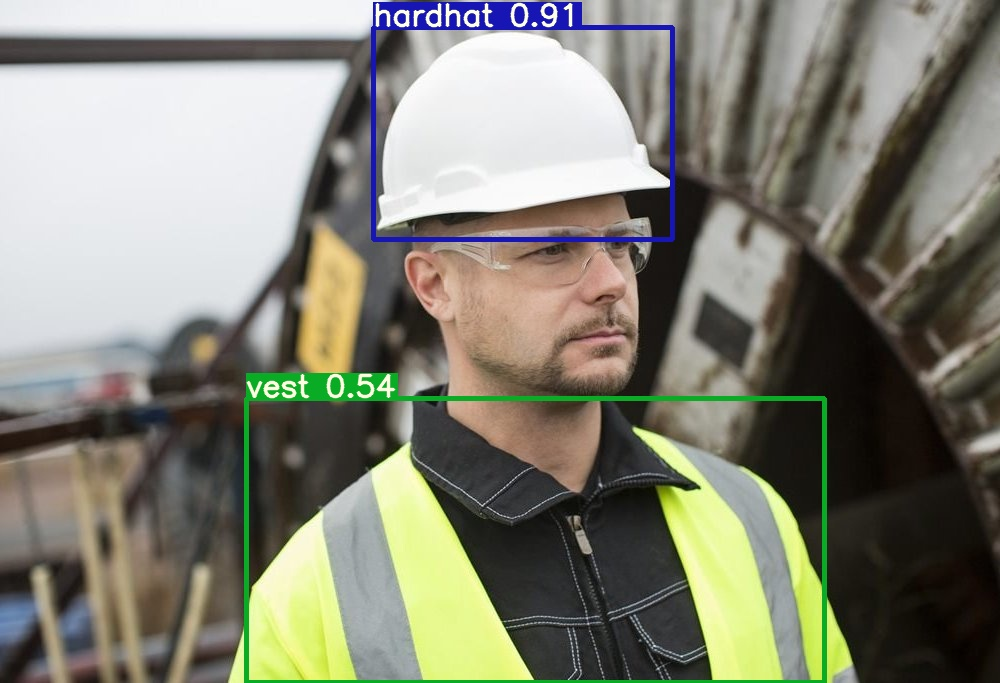

In [31]:
Image("/content/YoloV3/sample_pics/img_1.jpg", width=400)